In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.datasets import cifar10
from keras.utils import normalize,to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
train_datagen=ImageDataGenerator(rotation_range=45,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen.fit(X_train)

train_generator=train_datagen.flow(X_train,y_train,batch_size=32)

In [ ]:
activation='relu'
model=Sequential()
model.add(Conv2D(32,(3,3),activation=activation,padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation=activation,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=250,epochs=10,validation_data=(X_test,y_test))

<ipython-input-8-d21400aeb686>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=250,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
250/250 [==============================] - 93s 359ms/step - loss: 2.1454 - accuracy: 0.2651 - val_loss: 1.9494 - val_accuracy: 0.2830
Epoch 2/10
250/250 [==============================] - 84s 336ms/step - loss: 1.8115 - accuracy: 0.3497 - val_loss: 1.6568 - val_accuracy: 0.3952
Epoch 3/10
250/250 [==============================] - 85s 340ms/step - loss: 1.7251 - accuracy: 0.3836 - val_loss: 1.7574 - val_accuracy: 0.3802
Epoch 4/10
250/250 [==============================] - 90s 361ms/step - loss: 1.6597 - accuracy: 0.4035 - val_loss: 1.8139 - val_accuracy: 0.3742
Epoch 5/10
250/250 [==============================] - 120s 482ms/step - loss: 1.6105 - accuracy: 0.4180 - val_loss: 1.4842 - val_accuracy: 0.4727
Epoch 6/10
250/250 [==============================] - 121s 487ms/step - loss: 1.5591 - accuracy: 0.4420 - val_loss: 2.2107 - val_accuracy: 0.2944
Epoch 7/10
250/250 [==============================] - 134s 535ms/step - loss: 1.5340 - accuracy: 0.4499 - val_loss: 1.7691 - val

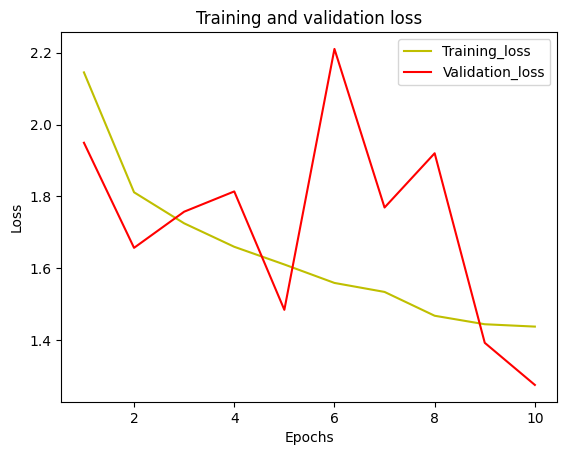

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import visualkeras

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 14.1 MB/s eta 0:00:00


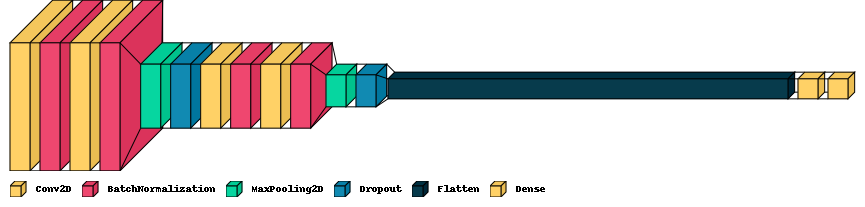

In [ ]:
visualkeras.layered_view(model,legend=True)
from PIL import ImageFont
font=ImageFont.load_default()
visualkeras.layered_view(model,legend=True,font=font)

mnist datset

In [ ]:
from keras.datasets import mnist